In [1]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

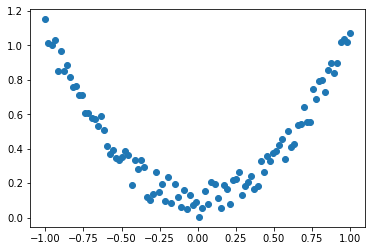

In [2]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc0 = torch.nn.Linear(n_feature, n_hidden)
        self.fc1 = torch.nn.Linear(n_hidden, n_output)
 
    def forward(self, x):
        x = self.fc0(x)
        x = torch.sigmoid(x)
        x = self.fc1(x)
        
        return x

Net(
  (fc0): Linear(in_features=1, out_features=20, bias=True)
  (fc1): Linear(in_features=20, out_features=1, bias=True)
)


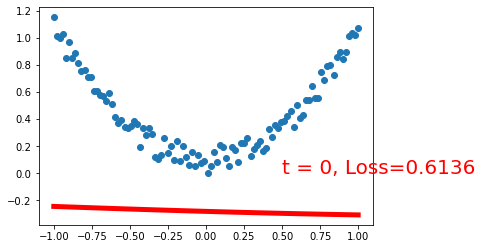

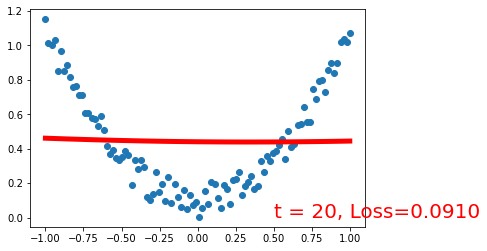

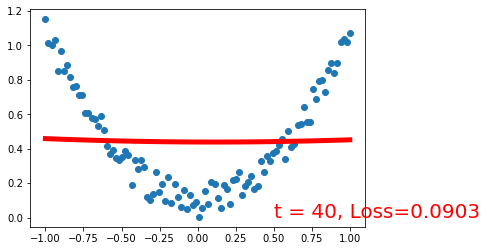

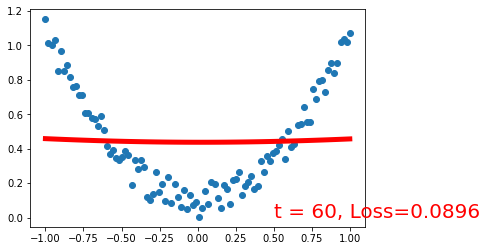

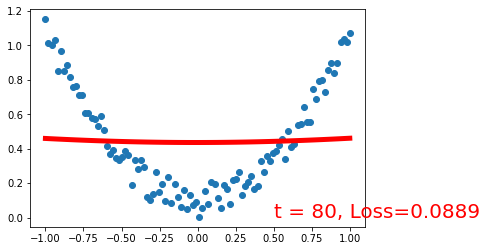

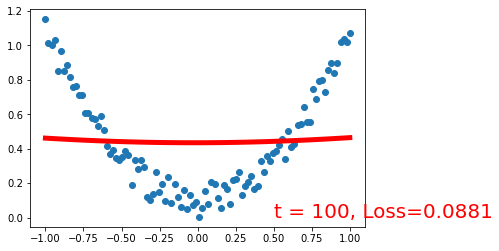

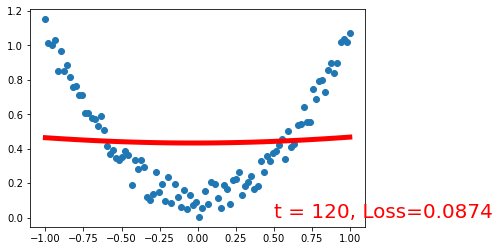

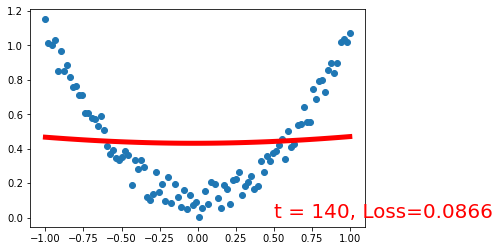

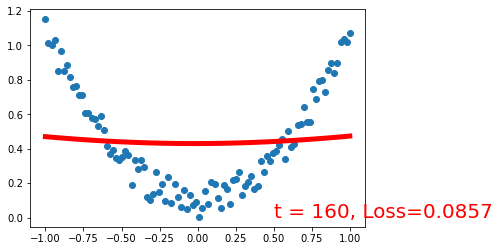

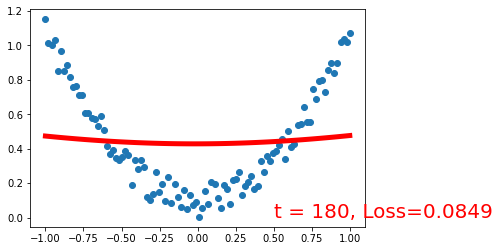

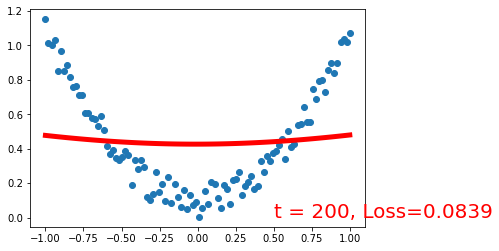

In [4]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

Net2(
  (fc0): Linear(in_features=1, out_features=20, bias=True)
  (fc1): Linear(in_features=20, out_features=1, bias=True)
)


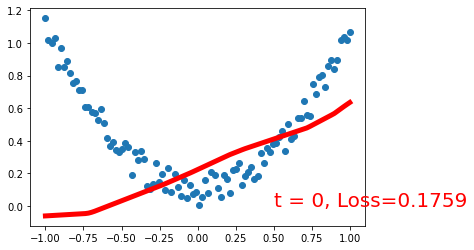

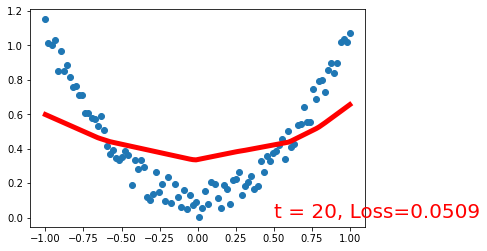

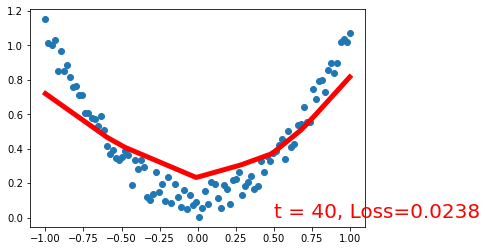

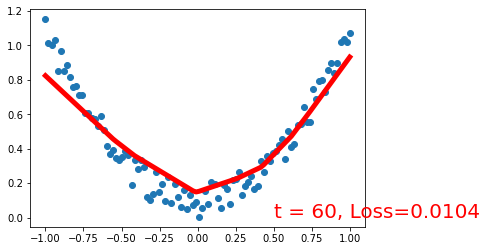

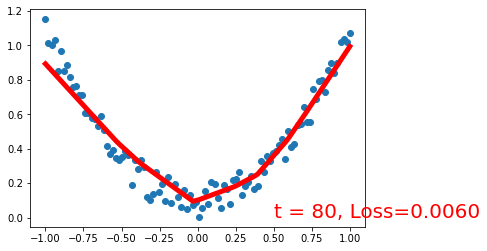

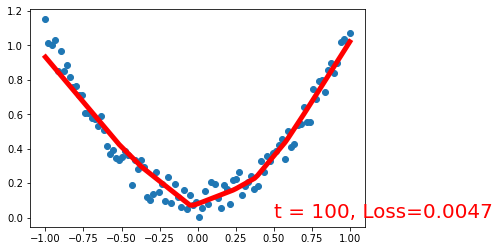

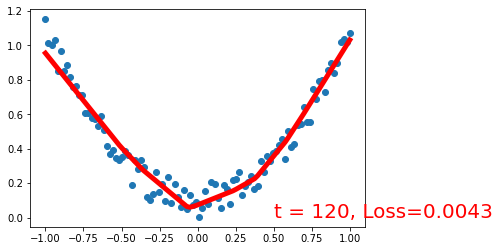

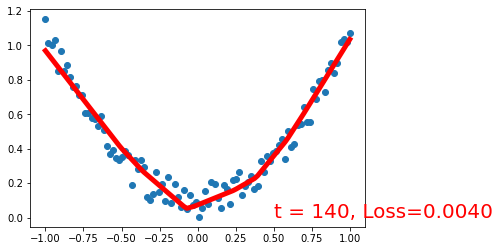

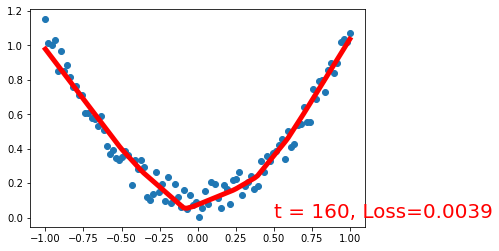

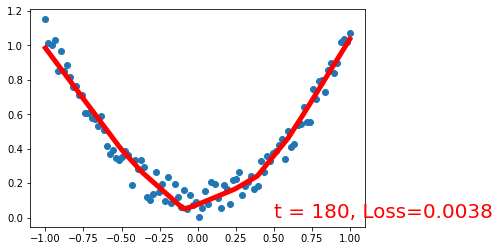

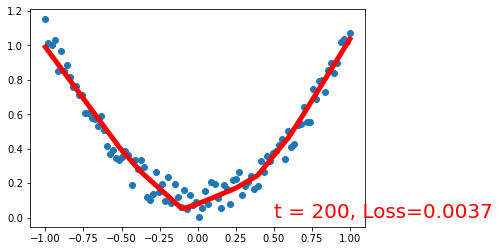

In [5]:
class Net2(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net2, self).__init__()
        self.fc0 = torch.nn.Linear(n_feature, n_hidden)
        self.fc1 = torch.nn.Linear(n_hidden, n_output)
 
    def forward(self, x):
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        
        return x
    
    
net2 = Net2(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net2)  # net architecture
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net2(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

In [27]:
print(x.shape)
W1 = torch.randn(1, 20, requires_grad=True)
b1 = torch.randn(100, 20, requires_grad=True)
h = x.mm(W1)+b1
h.retain_grad()
h_sig = torch.sigmoid(h)
h_sig.retain_grad()
print(h_sig.shape)
W2 = torch.randn(20, 1, requires_grad=True)
b2 = torch.randn(100, 1, requires_grad=True)
y_pred = h_sig.mm(W2)+b2
print(y_pred.shape)
f = (y - y_pred).pow(2).sum()

torch.Size([100, 1])
torch.Size([100, 20])
torch.Size([100, 1])


In [28]:
f.backward()

In [29]:
W2_grad = -2 * h_sig.t().mm(y - y_pred)
print(W2_grad)
print(W2.grad)
print(W2_grad == W2.grad)

tensor([[-217.1054],
        [-251.2649],
        [-233.6167],
        [-240.4409],
        [-217.1270],
        [-210.7745],
        [-250.7955],
        [-204.4788],
        [-216.0342],
        [-224.8528],
        [-224.8873],
        [-221.7430],
        [-234.1540],
        [-193.8342],
        [-238.2425],
        [-212.3533],
        [-256.7016],
        [-208.7364],
        [-202.6825],
        [-190.2961]], grad_fn=<MulBackward0>)
tensor([[-217.1054],
        [-251.2649],
        [-233.6167],
        [-240.4409],
        [-217.1270],
        [-210.7745],
        [-250.7955],
        [-204.4788],
        [-216.0342],
        [-224.8528],
        [-224.8873],
        [-221.7430],
        [-234.1540],
        [-193.8342],
        [-238.2425],
        [-212.3533],
        [-256.7016],
        [-208.7364],
        [-202.6825],
        [-190.2961]])
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
      

In [30]:
b2_grad = -2 * (y - y_pred)
print(b2_grad)
print(b2.grad)
print(b2_grad == b2.grad)

tensor([[ -8.2127],
        [ -7.3215],
        [ -4.0728],
        [  2.4882],
        [ -0.7425],
        [ -0.7090],
        [ -2.5370],
        [ -4.6978],
        [ -3.2679],
        [ -2.7083],
        [ -0.1924],
        [ -3.2173],
        [ -2.5673],
        [ -8.2280],
        [ -6.8343],
        [ -3.6570],
        [ -4.4943],
        [-10.3617],
        [ -5.0991],
        [ -7.7124],
        [ -6.3586],
        [ -0.8560],
        [ -2.6966],
        [ -3.1039],
        [ -7.8848],
        [  0.6135],
        [ -7.5434],
        [  2.0820],
        [  0.7598],
        [ -5.7572],
        [ -5.4748],
        [ -7.1746],
        [ -3.9165],
        [  0.3165],
        [ -3.8415],
        [ -3.0898],
        [ -4.2024],
        [ -1.4004],
        [ -0.3194],
        [ -1.6145],
        [  2.4056],
        [ -2.9001],
        [ -0.5437],
        [ -2.3832],
        [ -8.3765],
        [ -5.2044],
        [ -4.9196],
        [ -6.9552],
        [ -4.3887],
        [ -1.3989],


In [58]:
h_sig_grad = (b2_grad).mm(W2.t())
print(h_sig_grad == h_sig.grad)
h_grad = h_sig_grad*h_sig*(1-h_sig)
print(h_grad-h.grad<1e-5)
W1_grad = x.t().mm(h_grad)
print(W1_grad-W1.grad<1e-5)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])
tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])
tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True]])


In [59]:
b1_grad = -2 * (y - y_pred).mm(W2.t())*h_sig*(1-h_sig)
print(b1_grad-b1.grad<1e-6)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])
